<img src="./images/banner.png" width="800">

# Regression Toward the Mean

In the previous lectures, we explored the concepts of regression and learned how to evaluate the accuracy of regression predictions. We discussed the least squares method for finding the best-fitting regression line and the importance of the standard error of estimate and the squared correlation coefficient in assessing the precision of our predictions.


In this lecture, we will delve into a fascinating phenomenon known as **regression toward the mean**. This concept has important implications for understanding and interpreting changes in data over time, particularly when dealing with extreme values or repeated measurements.


Regression toward the mean is a statistical phenomenon that occurs when extreme values or measurements tend to be followed by values that are closer to the average or mean of the entire dataset. This phenomenon can often lead to misinterpretations of data and incorrect conclusions if not properly understood and accounted for.


Throughout this lecture, we will:

1. Define and explain the concept of regression toward the mean
2. Explore examples of regression toward the mean in various fields, such as education, sports, and healthcare
3. Discuss the implications of regression toward the mean in research and decision-making
4. Learn how to identify and avoid common pitfalls associated with regression toward the mean


By the end of this lecture, you will have a solid understanding of regression toward the mean and its significance in data analysis and interpretation. This knowledge will help you make more informed decisions and avoid drawing incorrect conclusions based on extreme values or measurements.


Let's begin by diving deeper into the definition and explanation of regression toward the mean.

**Table of contents**<a id='toc0_'></a>    
- [Definition and Explanation of Regression Toward the Mean](#toc1_)    
  - [Graphical Representation of Regression Toward the Mean](#toc1_1_)    
  - [Mathematical Explanation of the Phenomenon](#toc1_2_)    
- [Examples of Regression Toward the Mean](#toc2_)    
  - [Education: Student Performance and Test Scores](#toc2_1_)    
  - [Sports: Athlete Performance and Team Rankings](#toc2_2_)    
  - [Healthcare: Blood Pressure Measurements and Treatment Effects](#toc2_3_)    
  - [Other Real-World Examples](#toc2_4_)    
- [Implications of Regression Toward the Mean](#toc3_)    
- [Conclusion and Key Takeaways](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Definition and Explanation of Regression Toward the Mean](#toc0_)

Regression toward the mean is a statistical phenomenon that occurs when extreme values or measurements in a dataset tend to be followed by values that are closer to the mean of the entire dataset. In other words, if an initial observation or measurement is extremely high or low, the subsequent observation or measurement is more likely to be closer to the average.

This phenomenon is not due to any specific cause or intervention but rather a result of natural variability and the inherent tendency of data to cluster around the mean. It is important to note that regression toward the mean occurs in both directions - extremely high values tend to be followed by lower values, while extremely low values tend to be followed by higher values.


### <a id='toc1_1_'></a>[Graphical Representation of Regression Toward the Mean](#toc0_)

Regression toward the mean can be visualized using a scatterplot of two related variables or measurements. In the scatterplot, the x-axis represents the first measurement or observation, while the y-axis represents the second measurement or observation.


If regression toward the mean is present, the data points will tend to cluster around the mean of both variables, forming an elliptical shape. The slope of the regression line (which represents the relationship between the two variables) will be less steep than the 45-degree line, indicating that extreme values in the first measurement are associated with less extreme values in the second measurement.

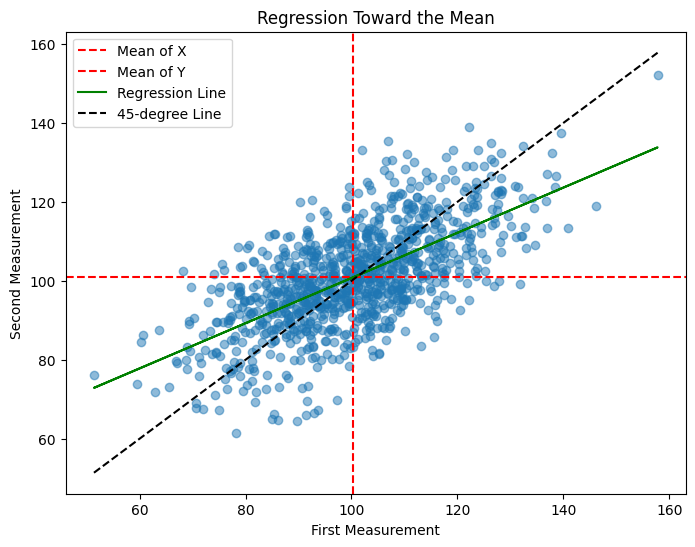

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate random data with correlation
x = np.random.normal(100, 15, 1000)
y = 0.6 * (x - 100) + 100 + np.random.normal(0, 10, 1000)

# Calculate means
mean_x = np.mean(x)
mean_y = np.mean(y)

# Create scatterplot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('First Measurement')
plt.ylabel('Second Measurement')
plt.title('Regression Toward the Mean')

# Add mean lines
plt.axvline(mean_x, color='r', linestyle='--', label='Mean of X')
plt.axhline(mean_y, color='r', linestyle='--', label='Mean of Y')

# Add regression line
b, a = np.polyfit(x, y, 1)
plt.plot(x, a + b * x, color='g', label='Regression Line')

# Add 45-degree line
min_val = min(np.min(x), np.min(y))
max_val = max(np.max(x), np.max(y))
plt.plot([min_val, max_val], [min_val, max_val], color='k', linestyle='--', label='45-degree Line')

plt.legend()
plt.show()

In this example scatterplot, the data points are clustered around the mean of both variables (represented by the intersection of the dashed lines). The regression line (solid line) has a slope less than 1, indicating that extreme values in the first measurement (x-axis) are associated with less extreme values in the second measurement (y-axis).

This phenomenon was first observed by Sir Francis Galton, a renowned statistician who made significant contributions to the field, including the introduction of concepts such as correlation, standard deviation, and percentiles. Galton devoted much of his life to studying variation in human populations, particularly in the context of heredity.

In his investigation of the relationship between the heights of parents and their children, Galton plotted the heights of 930 adult children against the mean height of their parents. He discovered that the data did not follow the expected trend line, but instead, the children's heights tended to be closer to the average height than their parents' heights. This finding, known as regression to the mean, suggests that extreme observations are likely to be followed by less extreme ones closer to the true mean.


<img src="./images/regression-to-the-mean-height.png" width="400">

Galton's work highlights the importance of considering regression to the mean in statistical analyses, as failing to do so can lead to misleading conclusions. For example, when estimating the impact of speed cameras on reducing fatal road accidents, initial analyses suggested that they saved an average of 100 lives per year. However, further analysis that accounted for regression to the mean found that 50% of the decline in accidents would have occurred regardless of the installation of speed cameras.


For example, if parent's height is 6 feet, the child's height is likely to be closer to the average height of the population (around 5'9") rather than 6 feet. On the other hand, if the parent's height is 5 feet, the child's height is also likely to be closer to the average height rather than 5 feet. This phenomenon is known as regression toward the mean.

<img src="./images/regression-toward-the-mean.png" width="800">

Regression to the mean remains a crucial statistical phenomenon that should not be neglected in data analysis. It serves as a reminder that extreme observations are often followed by less extreme ones, and that careful consideration must be given to the interpretation of data to avoid drawing incorrect conclusions.

Understanding the concept of regression toward the mean is crucial for interpreting changes in data over time and avoiding misinterpretations or incorrect conclusions based on extreme values or measurements. In the next section, we will explore real-world examples of regression toward the mean in various fields.


### <a id='toc1_2_'></a>[Mathematical Explanation of the Phenomenon](#toc0_)


To understand the mathematical basis of regression toward the mean, let's consider a dataset with a mean of $\mu$ and a standard deviation of $\sigma$. If we select an observation $x_1$ that is far from the mean (either much higher or much lower), the expected value of the next observation $x_2$ can be expressed as:

$E(x_2 | x_1) = \mu + \rho \frac{\sigma_2}{\sigma_1}(x_1 - \mu)$

where:
- $E(x_2 | x_1)$ is the expected value of $x_2$ given the value of $x_1$
- $\rho$ is the correlation coefficient between $x_1$ and $x_2$
- $\sigma_1$ and $\sigma_2$ are the standard deviations of $x_1$ and $x_2$, respectively


If the correlation between $x_1$ and $x_2$ is less than 1 (which is usually the case in real-world datasets), the term $\rho \frac{\sigma_2}{\sigma_1}$ will be less than 1. As a result, the expected value of $x_2$ will be closer to the mean $\mu$ than $x_1$.


## <a id='toc2_'></a>[Examples of Regression Toward the Mean](#toc0_)

Regression toward the mean can be observed in various fields, including education, sports, healthcare, and many other real-world situations. In this section, we will explore examples of how this phenomenon manifests in different contexts.


### <a id='toc2_1_'></a>[Education: Student Performance and Test Scores](#toc0_)


In educational settings, regression toward the mean can be observed when examining student performance and test scores over time. Consider a scenario where students take two similar tests:

- Students who perform exceptionally well on the first test (above the mean) are more likely to have lower scores on the second test, closer to the mean.
- Students who perform poorly on the first test (below the mean) are more likely to have higher scores on the second test, closer to the mean.

This phenomenon can lead to misinterpretations, such as attributing improvement in low-performing students to an intervention or teaching method, when in reality, the improvement may be due to regression toward the mean.


### <a id='toc2_2_'></a>[Sports: Athlete Performance and Team Rankings](#toc0_)


Regression toward the mean is common in sports, particularly when considering athlete performance and team rankings over multiple seasons or competitions.

- An athlete who performs exceptionally well in one season (above their average) is more likely to have a performance closer to their average in the following season.
- A team that ranks very high or very low in one season is more likely to have a ranking closer to the middle of the pack in the next season.

This phenomenon can lead to overestimating the impact of training or coaching changes on athlete or team performance, when the changes observed may be due to regression toward the mean.


### <a id='toc2_3_'></a>[Healthcare: Blood Pressure Measurements and Treatment Effects](#toc0_)


In healthcare, regression toward the mean can be observed in various physiological measurements, such as blood pressure readings.

- Patients with extremely high blood pressure readings in one visit are more likely to have lower readings in subsequent visits, closer to their average blood pressure.
- Patients with extremely low blood pressure readings in one visit are more likely to have higher readings in subsequent visits, closer to their average blood pressure.

This phenomenon can lead to overestimating the effectiveness of treatments or interventions, as the observed changes in blood pressure may be partially due to regression toward the mean rather than the treatment itself.


### <a id='toc2_4_'></a>[Other Real-World Examples](#toc0_)


Regression toward the mean can be observed in numerous other real-world situations, such as:

- **Stock market performance**: Companies with extremely high or low stock returns in one period are more likely to have returns closer to the market average in the following period.
- **Customer satisfaction surveys**: Customers who provide extremely positive or negative feedback in one survey are more likely to provide feedback closer to the average in subsequent surveys.
- **Employee performance evaluations**: Employees with exceptionally high or low performance ratings in one evaluation period are more likely to have ratings closer to the average in the next evaluation period.


In all these examples, it is essential to recognize the potential influence of regression toward the mean when interpreting changes or differences in data over time. Failing to account for this phenomenon can lead to incorrect conclusions and misguided decision-making.


In the next section, we will discuss the implications of regression toward the mean and how it can lead to misinterpretations and incorrect conclusions if not properly understood and accounted for.

## <a id='toc3_'></a>[Implications of Regression Toward the Mean](#toc0_)

Regression toward the mean can have significant implications for data analysis, interpretation, and decision-making. If not properly understood and accounted for, this phenomenon can lead to various issues:

- **Misinterpretation of data and incorrect conclusions**
  - Failing to consider regression toward the mean when observing changes or differences in data over time can lead to misinterpretations and incorrect conclusions.
  - Example: Attributing improvement in low-performing students solely to an intervention, when some improvement may be due to regression toward the mean.

- **Overestimating the effectiveness of interventions or treatments**
  - Interventions targeted at individuals with extreme initial values may appear more effective than they actually are, due to regression toward the mean.
  - To avoid this issue, use appropriate research designs (e.g., randomized controlled trials) and compare outcomes of the intervention group to a control group.

- **Underestimating the impact of extreme values or measurements**
  - Extreme values may be dismissed as outliers or attributed to random chance, when they may represent genuine and meaningful deviations from the norm.
  - Carefully examine extreme values and consider their potential causes and implications, as they may provide valuable insights or opportunities.


Understanding the implications of regression toward the mean is crucial for accurate data analysis, interpretation, and decision-making. By recognizing the potential pitfalls, researchers and decision-makers can take steps to account for this phenomenon and draw more reliable conclusions from their data.


## <a id='toc4_'></a>[Conclusion and Key Takeaways](#toc0_)

In this lecture, we have explored the concept of regression toward the mean, its implications, and strategies for dealing with this phenomenon in various contexts. Let's recap the main points covered:

- Regression toward the mean is a statistical phenomenon where extreme values or measurements tend to be followed by values closer to the mean of the entire dataset.
- This phenomenon can be observed in various fields, such as education, sports, healthcare, and other real-world situations.
- Failing to account for regression toward the mean can lead to misinterpretations, incorrect conclusions, and flawed decision-making.
- The implications of regression toward the mean include overestimating the effectiveness of interventions or treatments, underestimating the impact of extreme values, and misinterpreting data.
- To identify and avoid pitfalls associated with regression toward the mean, researchers and decision-makers should use control groups or comparison data, consider the role of chance and random variation, and employ appropriate statistical methods.


Understanding regression toward the mean is crucial for accurate data analysis and interpretation. By recognizing this phenomenon and its potential implications, researchers and decision-makers can draw more reliable conclusions and make better-informed decisions based on the available evidence.


In practice, this understanding can lead to:
- More accurate evaluations of interventions and treatments
- Better allocation of resources based on genuine effects rather than statistical artifacts
- More effective identification of meaningful deviations from the norm
- Improved decision-making in various domains, from education to healthcare to business


As you continue your journey in data analysis and interpretation, keep the concept of regression toward the mean in mind. Be cautious when interpreting changes or differences in data over time, and always consider alternative explanations for observed patterns.


Encourage yourself to apply this knowledge in your future research and decision-making. By doing so, you will be better equipped to navigate the complexities of data analysis and make more informed and reliable conclusions.


Remember, understanding regression toward the mean is not just a theoretical exercise – it has real-world implications that can impact the effectiveness of interventions, the allocation of resources, and the overall quality of decision-making. By mastering this concept and applying it in practice, you can contribute to more accurate and meaningful insights in your field of interest.